In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [0]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


# Convert datatype to float
df = df.astype(float)

# append "target" and rename it to "label"
df['label'] = iris['target']


# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

# Select first 2 records from each label
df_setosa = df[df['label'] == 'setosa'].head(2)
df_versicolor = df[df['label'] == 'versicolor'].head(2)
df_virginica = df[df['label'] == 'virginica'].head(2)
iris = pd.concat([df_setosa, df_versicolor, df_virginica])



# For simplicity, change columns name from 
#    | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | label |
#  to the below
iris.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'label']

In [9]:
iris

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


# 1. Selecting data (SELECT)

SELECT sepal_l, sepal_w, petal_l, petal_w 

FROM iris 

LIMIT 2

In [0]:
search = iris[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].head(2)

In [4]:
search

,sepal_l,sepal_w,petal_l,petal_w
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


# 2. Selecting data with conditions (WHERE)

## Single condition

In SQL, the filter is done via a WHERE clause

SELECT * 

FROM iris 

WHERE label='virginica'

In [0]:
search = iris[iris['label']=='virginica']

In [6]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


## Multiple conditions AND

For example, to retrieve all the data with label “virginica” and petal_length ≥ 5.5

In SQL, the WHERE clause can be combined with AND operator to display records if all the conditions separated by AND are true.

SELECT * 

FROM iris 

WHERE label='virginica'AND petal_l >= 5.5

In [0]:
search = iris[(iris['label']=='virginica') & 
              (iris['petal_l'] >= 5.5)]

In [8]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
100,6.3,3.3,6.0,2.5,virginica


## Multiple condition OR

For example, to retrieve all the data with either petal_length ≥ 5 or septal_length ≥ 6

In SQL, similar to AND operator, OR operator can be combined with WHERE to display records if any of the conditions separated by OR is true.

SELECT * 

FROM iris 

WHERE petal_l >= 5OR sepal_l >= 6

In [0]:
search = iris[(iris['petal_l'] >= 5) | 
              (iris['sepal_l'] >= 6)]

In [11]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


# 3. Working with missing values (NULL or NaN)

## Selecting records with missing value

For example, to retrieve all data with missing petal_length

In SQL, we can use IS NULL operator to test for NULL values

SELECT * 

FROM iris 

WHERE petal_l IS NULL

In [0]:
search = iris[iris['petal_l'].isna()]

In [13]:
search

,sepal_l,sepal_w,petal_l,petal_w,label


## Filter out missing values

For example, to retrieve all data with petal_length is not missing

In SQL, IS NOT NULL operator can be used to filter out missing values

SELECT * 

FROM iris 

WHERE petal_l IS NOT NULL

In [0]:
search = iris[iris['petal_l'].notna()]

In [15]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


# 4. Sorting result (ORDER BY)

## In Ascending order

For example, to retrieve all data with petal_l ≥ 4 from iris dataset, sorted by label column in ascending order

In SQL, the ORDER BY keyword is used to sort the result-set in ascending (ASC) order.

SELECT * 

FROM iris 

WHERE petal_l >= 4 

ORDER BY label ASC

In [0]:
#In Pandas, the equivalent query can be done with the method sort_values() with parameters by=’label’ and ascending=True
search = iris[iris['petal_l'] >= 4].sort_values(by='label', ascending=True)

In [17]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


## In Descending order

For example, to retrieve all data with petal_l ≥ 4 from iris dataset, sorted by label column in descending order.

In SQL, the ORDER BY keyword is used to sort the result-set in descending (DESC) order.

SELECT * 

FROM iris 

WHERE petal_l >= 4 

ORDER BY label DESC

In [0]:
search = iris[iris['petal_l'] >= 4].sort_values(by='label', ascending=False)

In [19]:
search

,sepal_l,sepal_w,petal_l,petal_w,label
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor


# 5. Updating records (UPDATE)

For example: update label to virginica for all the records with sepal_length = 7 and sepal_width = 3.2

In SQL, the UPDATE statement together with SET operator is used to modify the existing records

UPDATE iris 

SET label = 'virginica' 

WHERE sepal_l = 7 AND sepal_w = 3.2

In [0]:
#In Pandas, loc() can be used to access rows conditionally and return the specified column label . After that, we can set value for all records to virginica.
iris.loc[(iris['sepal_l'] == 7) & 
        (iris['sepal_w'] == 3.2), 'label'] = 'virginica'

In [21]:
iris

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,virginica
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


# 6. Grouping records (GROUP BY)

For example: find the number of record in each label

In SQL, the GROUP BY statement groups rows that have the same values into summary rows,

SELECT label, count(*) 

FROM iris 

GROUP BY label

In [0]:
#In Pandas, SQL’s GROUP BY operations are performed using the similarly named groupby() method.
search = iris.groupby('label').size()

In [23]:
search

label
setosa        2
versicolor    1
virginica     3
dtype: int64

## With multiple stats

For example: to find the average sepal_length and maximum petal_length in each label

In SQL, there are some built-in math functions we can use to accomplish the task:

SELECT label, avg(sepal_l), max(petal_l) 

FROM iris 

GROUP BY label

In [0]:
#In Pandas, agg() can be used to apply multiple functions at once:
search = iris.groupby('label').agg(
       { 'sepal_l': np.mean, 'petal_l': np.max})

In [25]:
search

,sepal_l,petal_l
label,,
setosa,5.000000,1.4
versicolor,6.400000,4.5
virginica,6.366667,6.0


# 7. Removing records

For example: to remove records with petal_width = 1.7 and petal_length ≥ 5

In SQL, the DELETE statement is used to delete existing records

DELETE FROM iris 

WHERE petal_w = 1.7 AND petal_l >= 5

In [0]:
#In Pandas, the equivalent method is drop() . And the parameter given to that should be the index of the matches records iris[(iris[‘petal_w’] == 1.7) & (iris[‘petal_l’] >= 4)].index .
drop = iris.drop(iris[(iris['petal_w'] == 1.7) 
                      & (iris['petal_l'] >= 4)].index)

In [27]:
drop

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,virginica
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [28]:
iris

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,virginica
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


# 8. Querying data from multiple datasets (JOIN)

There are 4 different types of Joins


1.   Inner Join: returns records that have matching values in both datasets
2.   Left (Outer) Join: returns all records from the left dataset, and the matched records from the right dataset
3.   Right (Outer) Join: returns all records from the right dataset, and the matched records from the left dataset
4.   Full (Outer) Join: returns all records when there is a match in either left or right dataset

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


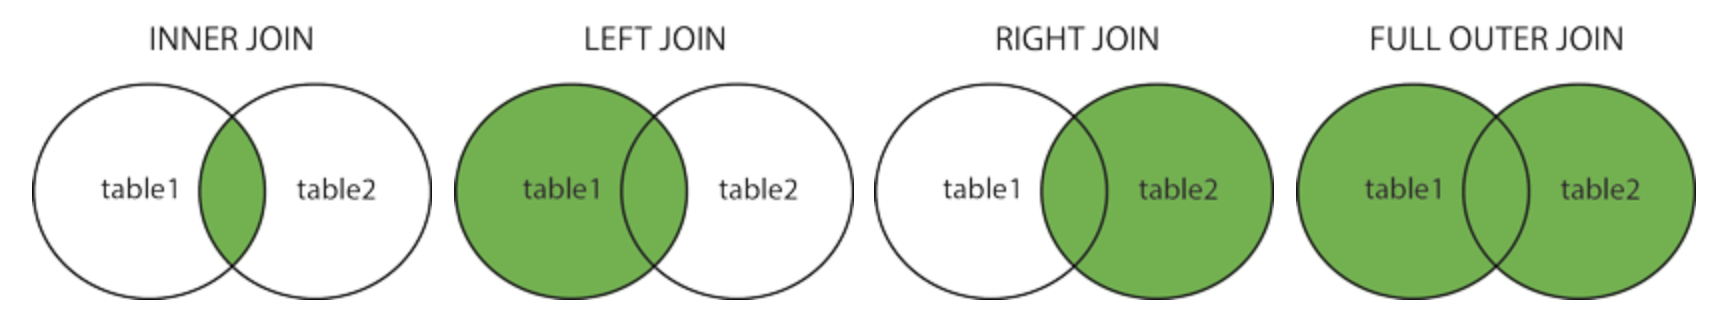

In [31]:
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')
Image(filename='/content/drive/My Drive/pandas/join.png') 

In [0]:
#Before we diving into the details, let’s make up a new dataset country, which has records about where the flower was found:
country = pd.DataFrame({ 'label': ['virginica', 'versicolor'],
                  'country': ['US', 'Germany']})

In [33]:
country

,label,country
0,virginica,US
1,versicolor,Germany


## Inner Join

For example: to retrieve all records that have matching values in both iris and country datasets, based on the label

SELECT * FROM iris 

INNER JOIN country 

ON iris.label = country.label

In [0]:
#In Pandas, the method merge() offers parameters for cases when you’d like to join two DataFrames based on a related column. 
#And by default, it does the inner join.
inner = pd.merge(iris, country, on='label')

In [35]:
inner

,sepal_l,sepal_w,petal_l,petal_w,label,country
0,7.0,3.2,4.7,1.4,virginica,US
1,6.3,3.3,6.0,2.5,virginica,US
2,5.8,2.7,5.1,1.9,virginica,US
3,6.4,3.2,4.5,1.5,versicolor,Germany


## Left Outer Join

For example: to retrieve all records from the iris, and the matched records from the country, based on the label.

SELECT * FROM iris 

LEFT OUTER JOIN country

ON iris.label = country.label

In [0]:
left = pd.merge(iris, country, on='label', how='left')

In [37]:
left

,sepal_l,sepal_w,petal_l,petal_w,label,country
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,7.0,3.2,4.7,1.4,virginica,US
3,6.4,3.2,4.5,1.5,versicolor,Germany
4,6.3,3.3,6.0,2.5,virginica,US
5,5.8,2.7,5.1,1.9,virginica,US


## Right Outer Join

For example: to retrieve all records from the country, and the matched records from the iris, based on label.

SELECT * FROM iris 

RIGHT OUTER JOIN country 

ON iris.label = country.label

In [0]:
right = pd.merge(iris, country, on='label', how='right')

In [39]:
right

,sepal_l,sepal_w,petal_l,petal_w,label,country
0,7.0,3.2,4.7,1.4,virginica,US
1,6.3,3.3,6.0,2.5,virginica,US
2,5.8,2.7,5.1,1.9,virginica,US
3,6.4,3.2,4.5,1.5,versicolor,Germany


## Full Outer Join

For example: to retrieve all records when there is a match in iris or country datasets, based on label.

SELECT * FROM iris 

FULL OUTER JOIN country

ON iris.label = country.label

In [0]:
full = pd.merge(iris, country, on='label', how='outer')

In [41]:
full

,sepal_l,sepal_w,petal_l,petal_w,label,country
0,5.1,3.5,1.4,0.2,setosa,NaN
1,4.9,3.0,1.4,0.2,setosa,NaN
2,7.0,3.2,4.7,1.4,virginica,US
3,6.3,3.3,6.0,2.5,virginica,US
4,5.8,2.7,5.1,1.9,virginica,US
5,6.4,3.2,4.5,1.5,versicolor,Germany


# 9. Combining the results of multiple queries (UNION)

In data processing, it is also common to combine the results of two or more queries into a single result. 
In order to combine the results, each query must have the same number of columns with same data types.
For demonstration, let’s make up two datasets from iris. 
Note, we also make up a duplicate record as shown in the figure.

In [0]:
iris_a = iris[0:3]
iris_b = iris[2:]

In [43]:
iris_a

,sepal_l,sepal_w,petal_l,petal_w,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,virginica


In [44]:
iris_b

,sepal_l,sepal_w,petal_l,petal_w,label
50,7.0,3.2,4.7,1.4,virginica
51,6.4,3.2,4.5,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


## To allow duplicate values

In SQL, the UNION ALL operator can be used to allow duplicate values

SELECT * FROM iris_a WHERE label = 'virginica' 

UNION ALL 

SELECT * FROM iris_b WHERE label = 'virginica'

In [0]:
#In Pandas, the equivalent method is concat() and by default it allows all the duplicates.
union = pd.concat([iris_a[iris_a['label']=='virginica'], iris_b[iris_b['label']=='virginica']])

In [46]:
union

,sepal_l,sepal_w,petal_l,petal_w,label
50,7.0,3.2,4.7,1.4,virginica
50,7.0,3.2,4.7,1.4,virginica
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


## Without duplicate values

In SQL, the UNION operator selects only distinct values

SELECT * FROM iris_a WHERE label = 'virginica' 

UNION 

SELECT * FROM iris_b WHERE label = 'virginica'

In [0]:
#In Pandas, you can use concat() in conjunction with drop_duplicates().
union = pd.concat([iris_a[iris_a['label']=='virginica'], iris_b[iris_b['label']=='virginica']]).drop_duplicates()

In [50]:
union

,sepal_l,sepal_w,petal_l,petal_w,label
50,7.0,3.2,4.7,1.4,virginica
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
